In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_X,train_Y), (test_X,test_Y) = keras.datasets.mnist.load_data()

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 83s 88ms/step - loss: 0.1523 - accuracy: 0.9546
Epoch 2/5
938/938 [==============================] - 78s 83ms/step - loss: 0.0506 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 77s 82ms/step - loss: 0.0370 - accuracy: 0.9877
Epoch 4/5
938/938 [==============================] - 78s 83ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 78s 83ms/step - loss: 0.0223 - accuracy: 0.9930


313/313 [==============================] - 4s 13ms/step - loss: 0.0378 - accuracy: 0.9886
Test loss 0.0378384068608284
Test accuracy 0.9886000156402588
7


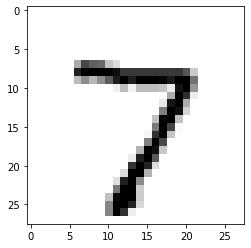

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()